<a href="https://colab.research.google.com/github/Yunseokjin/Final-Team1/blob/main/1%ED%8C%80_%EC%9C%A4%EC%84%9D%EC%A7%84_%ED%8C%8C%EC%9D%B4%EB%84%90_%EB%A6%AC%EB%B7%B0%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ÌïúÍ∏Ä Í∏ÄÏî® Ìè∞Ìä∏ ÏÑ§Ïπò
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# ÌëúÏóêÏÑú ('-') ÎßàÏù¥ÎÑàÏä§ ÌëúÏãú
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# =============================================================
# [Step 1] Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: ÏòÅÏñ¥ Î¶¨Î∑∞ ÌïÑÌÑ∞ÎßÅ Î∞è Í∑∏Î£πÌïë
# =============================================================
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm

# --- 1-1. ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (ÌïÑÏöîÏãú) ---
!pip install -q transformers torch vaderSentiment bertopic konlpy

# --- 1-2. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ---
file_path = '/content/S-team_250930-final.csv'
try:
    df_original = pd.read_csv(file_path)
    print(f"‚úÖ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å! (Shape: {df_original.shape})")
except FileNotFoundError:
    print(f"‚ùå ÌååÏùº Î°úÎìú Ïã§Ìå®: '{file_path}' Í≤ΩÎ°úÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")

# --- 1-3. Ïñ∏Ïñ¥ ÌÉêÏßÄ Î∞è ÏòÅÏñ¥(ÎπÑÌïúÍµ≠Ïñ¥) Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ---
tqdm.pandas()

def detect_language(text):
    if not isinstance(text, str) or len(text.strip()) == 0: return 'unknown'
    return 'korean' if re.search("[„Ñ±-Ìû£]", text) else 'english'

# 'translated_en' Ïª¨ÎüºÏùò ÏõêÎ≥∏ ÌÖçÏä§Ìä∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Ïñ∏Ïñ¥ ÌÉêÏßÄ
df_original['language_detected'] = df_original['review'].progress_apply(detect_language)

# üî• Î∂ÑÏÑù ÎåÄÏÉÅÏùÑ 'ÏòÅÎ¨∏ Î¶¨Î∑∞'Î°ú ÌïúÏ†ï
df_english = df_original[df_original['language_detected'] != 'korean'].copy()
print(f"\n‚úÖ ÏòÅÏñ¥(ÎπÑÌïúÍµ≠Ïñ¥) Î¶¨Î∑∞ ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å! (Ï¥ù {len(df_english)}Í∞ú)")


# --- 1-4. ÏÇ¨Ïö©Ïûê Í∑∏Î£πÌïë Ïª¨Îüº ÏÉùÏÑ± ---
# Playtime Í∏∞Ï§Ä Í∑∏Î£πÌïë
df_english['playtime_hours_at_review'] = df_english['author_playtime_at_review'] / 60.0
# 'own'Í≥º 'trial' Í∑∏Î£πÏùÑ Î≥ëÌï©
df_english['playtime_merged'] = df_english['user_groupby_playtime'].replace({
    'own': 'Ï¥àÍ∏∞ ÌÉêÏÉâ(0-10h)', 'trial': 'Ï¥àÍ∏∞ ÌÉêÏÉâ(0-10h)',
    'normal': 'ÏùºÎ∞ò Ïú†Ï†Ä', 'heavy': 'Ìó§ÎπÑ Ïú†Ï†Ä', 'core': 'ÏΩîÏñ¥ Ïú†Ï†Ä'
})

print("\n--- ÏÉùÏÑ±Îêú ÌîåÎ†àÏù¥ÌÉÄÏûÑ Í∑∏Î£π Î∂ÑÌè¨ ---")
print(df_english['playtime_merged'].value_counts())

‚úÖ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å! (Shape: (188273, 52))


  0%|          | 0/188273 [00:00<?, ?it/s]


‚úÖ ÏòÅÏñ¥(ÎπÑÌïúÍµ≠Ïñ¥) Î¶¨Î∑∞ ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å! (Ï¥ù 184982Í∞ú)

--- ÏÉùÏÑ±Îêú ÌîåÎ†àÏù¥ÌÉÄÏûÑ Í∑∏Î£π Î∂ÑÌè¨ ---
playtime_merged
ÏùºÎ∞ò Ïú†Ï†Ä           136438
Ìó§ÎπÑ Ïú†Ï†Ä            37033
ÏΩîÏñ¥ Ïú†Ï†Ä             9245
Ï¥àÍ∏∞ ÌÉêÏÉâ(0-10h)      2266
Name: count, dtype: int64


In [ ]:
# =============================================================
# [Step 2] Í∞êÏÑ± Î∂ÑÏÑù: VADER Î™®Îç∏ Ï†ÅÏö©
# =============================================================
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# --- 2-1. VADER Î∂ÑÏÑùÍ∏∞ Î°úÎìú ---
vader_analyzer = SentimentIntensityAnalyzer()

# --- 2-2. Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò ---
def get_vader_score(text):
    if not isinstance(text, str):
        return 0.0
    # VADERÎäî ÏõêÎ¨∏ ÌÖçÏä§Ìä∏Ïóê Î∞îÎ°ú Ï†ÅÏö©
    return vader_analyzer.polarity_scores(text)['compound']

# --- 2-3. Í∞êÏÑ± Ï†êÏàò Î∞è Í∑∏Î£π Ïª¨Îüº ÏÉùÏÑ± ---
print("\nÏòÅÏñ¥ Î¶¨Î∑∞Ïóê VADER Í∞êÏÑ± Î∂ÑÏÑù Ï†ÅÏö© Ï§ë...")
df_english['sentiment_score'] = df_english['translated_en'].progress_apply(get_vader_score)

def assign_sentiment_group_strict(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.3:  # üî• Î∂ÄÏ†ï Í∏∞Ï§ÄÏùÑ -0.05ÏóêÏÑú -0.3ÏúºÎ°ú Í∞ïÌôî
        return 'Negative'
    else:
        return 'Neutral'

# Í∞ïÌôîÎêú Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Ïã§Ìñâ
df_english['sentiment_group'] = df_english['sentiment_score'].apply(assign_sentiment_group_strict)

print("\n‚úÖ [Í∞ïÌôîÎêú Í∏∞Ï§Ä] Í∞êÏÑ± Î∂ÑÏÑù ÏôÑÎ£å!")
print("--- Í∞êÏÑ± Í∑∏Î£π Î∂ÑÌè¨ ---")
print(df_english['sentiment_group'].value_counts())


ÏòÅÏñ¥ Î¶¨Î∑∞Ïóê VADER Í∞êÏÑ± Î∂ÑÏÑù Ï†ÅÏö© Ï§ë...


  0%|          | 0/184982 [00:00<?, ?it/s]


‚úÖ [Í∞ïÌôîÎêú Í∏∞Ï§Ä] Í∞êÏÑ± Î∂ÑÏÑù ÏôÑÎ£å!
--- Í∞êÏÑ± Í∑∏Î£π Î∂ÑÌè¨ ---
sentiment_group
Positive    97539
Neutral     50273
Negative    37170
Name: count, dtype: int64


In [ ]:
# =============================================================
# ‚ú® [Í∞úÏÑ†Îêú Ï†ÑÎûµ] Step 3: Í≥†ÎèÑÌôîÎêú LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ‚ú®
# =============================================================
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# --- Ïù¥Ï†Ñ Step 1 & 2Îäî ÎèôÏùºÌïòÍ≤å Ïã§ÌñâÌïòÏó¨ 'df_english' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§ ---

print("\n" + "="*60)
print("‚ú® [Í∞úÏÑ†Îêú Î∂ÑÏÑù] Í∑∏Î£πÎ≥Ñ 'Ï∞®Î≥ÑÌôîÎêú' Ï£ºÏöî Î∂àÎßå ÏÇ¨Ìï≠ (LDA) ‚ú®")
print("="*60)

playtime_categories = ['Ï¥àÍ∏∞ ÌÉêÏÉâ(0-10h)', 'ÏùºÎ∞ò Ïú†Ï†Ä', 'Ìó§ÎπÑ Ïú†Ï†Ä', 'ÏΩîÏñ¥ Ïú†Ï†Ä']
# Í∑∏Î£πÎ≥Ñ ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
final_results = {}

# üî• [ÌïµÏã¨ Í∞úÏÑ† 1] Í∞ïÎ†•Ìïú Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ Íµ¨Ï∂ï
# Í∏∞Î≥∏ ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ + ÏùºÎ∞òÏ†ÅÏù∏ Í≤åÏûÑ Ïö©Ïñ¥ + Ïù¥Ï†Ñ Î∂ÑÏÑùÏóêÏÑú Î∞úÍ≤¨Îêú Î¨¥ÏùòÎØ∏Ìïú Îã®Ïñ¥ Î™®Îëê Ï∂îÍ∞Ä
custom_stop_words = list(ENGLISH_STOP_WORDS) + [
    'game', 'games', 'play', 'playing', 'player', 'players', 'just', 'like',
    'really', 'don', 'doesn', 'im', 've', 'time', 'lot', 'way', 'thing',
    'good', 'bad', 'great', 'problem', 'problems', 'issue', 'issues', 'bit', 'even',
    'got', 'didn', 'think', 'thought', 'said', 'saw', 'know', 'want', 'make',
    'actually', 'people', 'going', 'getting', 'little', 'much', 'review', 'steam'
]
# üî• V2: Í∞êÏ†ï ÌëúÌòÑ Î∞è Î≤îÏö©Ï†Å Î∂ÄÏ†ï Îã®Ïñ¥ Ï∂îÍ∞Ä
custom_stop_words_v2 = custom_stop_words + [
    'kill', 'killed', 'die', 'dead', 'death', 'hate',         # Ìè≠Î†•/Ï£ΩÏùå Í¥ÄÎ†®
    'fuck', 'shit', 'ass', 'crap', 'motherfucking', 'bull', # ÏöïÏÑ§/ÎπÑÏÜçÏñ¥
    'bullying', 'bully',                                      # ÌäπÏ†ï Í≤åÏûÑÏóêÏÑú ÎßéÏù¥ ÎÇòÏò® Î∂àÏö©Ïñ¥
    'll', 'guy', 'guys', 'man', 'life'                         # ÏùºÎ∞òÏ†ÅÏù∏ Î™ÖÏÇ¨/ÎåÄÎ™ÖÏÇ¨
]

for segment in playtime_categories:
    print(f"\n--- üë• Í∑∏Î£π: {segment} ---")
    segment_df = df_english[
        (df_english['playtime_merged'] == segment) &
        (df_english['sentiment_group'] == 'Negative') # 'Negative' Í∑∏Î£πÎßå Î∂ÑÏÑù
    ]

    num_docs = len(segment_df)
    if num_docs < 50: # Î∂ÑÏÑùÏùò Ïã†Î¢∞ÎèÑÎ•º ÏúÑÌï¥ ÏµúÏÜå Î¨∏ÏÑú ÏàòÎ•º 50ÏúºÎ°ú ÏÉÅÌñ•
        print(f"Î∂ÄÏ†ï Î¶¨Î∑∞ ÏàòÍ∞Ä {num_docs}Í∞úÎ°ú Î∂ÑÏÑùÌïòÍ∏∞Ïóê Î∂ÄÏ°±Ìï©ÎãàÎã§.")
        continue

    docs = segment_df['translated_en'].dropna().astype(str).tolist()
    print(f"Ï¥ù {len(docs)}Í∞úÏùò ÏòÅÏñ¥ Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏãúÏûë...")

    try:
        # üî• [ÌïµÏã¨ Í∞úÏÑ† 2] Vectorizer ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
        # min_df: ÎÑàÎ¨¥ ÎìúÎ¨ºÍ≤å ÎÇòÏò§Îäî Îã®Ïñ¥ Ï†úÍ±∞ (ÏµúÏÜå 10Í∞ú Î¨∏ÏÑú Ïù¥ÏÉÅ Îì±Ïû•)
        # max_df: ÎÑàÎ¨¥ ÏûêÏ£º ÎÇòÏò§Îäî Îã®Ïñ¥ Ï†úÍ±∞ (ÏÉÅÏúÑ 85% Ïù¥ÏÉÅ Îì±Ïû• Îã®Ïñ¥ Ï†úÏô∏)
        # ngram_range: Îã®Ïñ¥ Î¨∂Ïùå(Ïòà: 'server connection')ÏùÑ Ìï®Íªò Î∂ÑÏÑùÌïòÏó¨ ÏùòÎØ∏ Ï†ïÌôïÎèÑ Ìñ•ÏÉÅ
        vectorizer = CountVectorizer(
            stop_words=custom_stop_words_v2,
            min_df=10,
            max_df=0.85,
            ngram_range=(1, 2) # 1Í∞ú Îã®Ïñ¥ Î∞è 2Í∞ú Ïó∞ÏÜç Îã®Ïñ¥ Î™®Îëê Í≥†Î†§
        )
        X = vectorizer.fit_transform(docs)

        # üî• [ÌïµÏã¨ Í∞úÏÑ† 3] Ï∞æÍ≥†Ïûê ÌïòÎäî ÌÜ†ÌîΩÏùò ÏàòÎ•º 3~5Í∞úÎ°ú Ï§ÑÏó¨ Î™ÖÌôïÏÑ± ÌôïÎ≥¥
        lda_model = LatentDirichletAllocation(
            n_components=4, # ÌïµÏã¨ Î∂àÎßå 4Í∞úÎ•º Ï∞æÎäîÎã§Í≥† Í∞ÄÏ†ï
            random_state=42,
            learning_method='online', # ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê Îçî Îπ†Î¶Ñ
            n_jobs=-1 # Î™®Îì† CPU ÏΩîÏñ¥ ÏÇ¨Ïö©
        )
        lda_model.fit(X)

        # 3. Í≤∞Í≥º Ìï¥ÏÑù Î∞è Ï†ÄÏû•
        topics = []
        feature_names = vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(lda_model.components_):
            top_keywords = [feature_names[i] for i in topic.argsort()[:-8:-1]] # ÏÉÅÏúÑ 7Í∞ú ÌÇ§ÏõåÎìú
            topics.append({
                "Topic #": topic_idx,
                "Keywords": ", ".join(top_keywords)
            })

        results_df = pd.DataFrame(topics)
        final_results[segment] = results_df
        print("\nüî• Î∞úÍ≤¨Îêú Ï£ºÏöî Î∂àÎßå ÌÜ†ÌîΩ:")
        display(results_df)

    except Exception as e:
        print(f"‚ö†Ô∏è LDA Î™®Îç∏ÎßÅ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")


‚ú® [Í∞úÏÑ†Îêú Î∂ÑÏÑù] Í∑∏Î£πÎ≥Ñ 'Ï∞®Î≥ÑÌôîÎêú' Ï£ºÏöî Î∂àÎßå ÏÇ¨Ìï≠ (LDA) ‚ú®

--- üë• Í∑∏Î£π: Ï¥àÍ∏∞ ÌÉêÏÉâ(0-10h) ---
Ï¥ù 503Í∞úÏùò ÏòÅÏñ¥ Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏãúÏûë...

üî• Î∞úÍ≤¨Îêú Ï£ºÏöî Î∂àÎßå ÌÜ†ÌîΩ:


Topic #                                           Keywords
0        0   buy, played, version, store, wrong, bought, lost
1        1  chinese, money, world, look, level, start, hor...
2        2   head, say, money, family, finally, pay, terrible
3        3          new, old, years, minutes, real, war, work


--- üë• Í∑∏Î£π: ÏùºÎ∞ò Ïú†Ï†Ä ---
Ï¥ù 27120Í∞úÏùò ÏòÅÏñ¥ Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏãúÏûë...

üî• Î∞úÍ≤¨Îêú Ï£ºÏöî Î∂àÎßå ÌÜ†ÌîΩ:


Topic #                                           Keywords
0        0        world, able, horror, years, money, old, buy
1        1      story, hard, second, battle, hot, away, point
2        2  gameplay, gun, main, stop, characters, use, ch...
3        3     person, war, head, blood, dog, day, centimeter


--- üë• Í∑∏Î£π: Ìó§ÎπÑ Ïú†Ï†Ä ---
Ï¥ù 7750Í∞úÏùò ÏòÅÏñ¥ Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏãúÏûë...

üî• Î∞úÍ≤¨Îêú Ï£ºÏöî Î∂àÎßå ÌÜ†ÌîΩ:


Topic #                                           Keywords
0        0  gameplay, team, big, gameplay gameplay, walls,...
1        1      world, dragon, years, chinese, old, war, able
2        2      hours, server, gun, died, car, character, say
3        3        new, cat, battle, enemy, line, attack, need


--- üë• Í∑∏Î£π: ÏΩîÏñ¥ Ïú†Ï†Ä ---
Ï¥ù 1797Í∞úÏùò ÏòÅÏñ¥ Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú LDA ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ ÏãúÏûë...

üî• Î∞úÍ≤¨Îêú Ï£ºÏöî Î∂àÎßå ÌÜ†ÌîΩ:


Topic #                                           Keywords
0        0        hours, chinese, gun, world, new, mode, main
1        1         new, years, war, able, started, old, enemy
2        2  hot, gameplay, waste, team, simulator, longer,...
3        3  walls, fun, battle, community, hanging, open, ...

In [ ]:
# =============================================================
# ‚ú® [ÏµúÏ¢Ö Îã®Í≥Ñ] Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ Î∞è Ìï¥ÏÑù ‚ú®
# =============================================================

print("\n\n" + "="*60)
print("‚ú® Ï†ÑÏ≤¥ Í∑∏Î£πÎ≥Ñ Ï£ºÏöî Î∂àÎßå ÏÇ¨Ìï≠ ÏöîÏïΩ ‚ú®")
print("="*60)

# Ïù¥Ï†Ñ LDA Î∂ÑÏÑùÏóêÏÑú ÎèÑÏ∂úÎêú ÌÇ§ÏõåÎìúÎ•º Î∞îÌÉïÏúºÎ°ú Í∞Å ÌÜ†ÌîΩÏóê ÏùòÎØ∏(Î†àÏù¥Î∏î)Î•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
# Ïù¥ Ìï¥ÏÑùÏùÄ Î∂ÑÏÑùÍ∞ÄÏùò Ï£ºÍ¥ÄÏù¥ Îì§Ïñ¥Í∞ÄÎäî Î∂ÄÎ∂ÑÏù¥Î©∞, Î∞úÌëúÏùò ÌïµÏã¨Ï†ÅÏù∏ Ï£ºÏû•ÏûÖÎãàÎã§.

# --- 1. Í∞Å Í∑∏Î£πÎ≥Ñ ÌÇ§ÏõåÎìú Ìï¥ÏÑù Î∞è Î†àÏù¥Î∏îÎßÅ ---
summary_data = {
    'ÌîåÎ†àÏù¥ÌÉÄÏûÑ Í∑∏Î£π': [
        'Ï¥àÍ∏∞ ÌÉêÏÉâ (0-10h)',
        'ÏùºÎ∞ò Ïú†Ï†Ä (10-100h)',
        'Ìó§ÎπÑ Ïú†Ï†Ä (100h+)',
        'ÏΩîÏñ¥ Ïú†Ï†Ä (ÏàòÎ∞± ÏãúÍ∞Ñ+)'
    ],
    'ÌïµÏã¨ Î∂àÎßå (Topic 1)': [
        'Í∏∞ÎåÄÏôÄ Îã§Î•∏ Ï≤´Ïù∏ÏÉÅ (Íµ¨Îß§/Í∞ÄÏπò ÌåêÎã®)',
        'Í≤åÏûÑÏùò Î≥∏ÏßàÏ†Å Ïû¨ÎØ∏ Î∂ÄÏ°± (Í≤åÏûÑÌîåÎ†àÏù¥/Ïä§ÌÜ†Î¶¨)',
        'ÏΩòÌÖêÏ∏† Í≥†Í∞à Î∞è Ï†ïÏ≤¥ (ÏÉàÎ°úÏö¥ ÏΩòÌÖêÏ∏†/ÏÑúÎ≤Ñ)',
        'Í≤åÏûÑÏùò Ïû•Í∏∞Ï†Å ÎπÑÏ†Ñ Î∂ÄÏû¨ (ÏÜåÌÜµ/ÎØ∏Îûò)'
    ],
    'ÎåÄÌëú ÌÇ§ÏõåÎìú (Topic 1)': [
        'buy, version, store, money, minutes',
        'gameplay, story, characters, hard',
        'new, enemy, server, hours',
        'community, fun, waste, longer'
    ],
    'ÌïµÏã¨ Î∂àÎßå (Topic 2)': [
        'Í∏∞Ïà†Ï†Å Î¨∏Ï†ú Î∞è ÏôÑÏÑ±ÎèÑ',
        'Î∂àÏæåÌïú Í≤ΩÌóò (ÎÇúÏù¥ÎèÑ/Ï†ÑÌà¨)',
        'Î∞òÎ≥µ ÌîåÎ†àÏù¥Ïùò ÌîºÎ°úÍ∞ê',
        'Ïª§ÎÆ§ÎãàÌã∞ Î∞è Ïö¥ÏòÅ Î¨∏Ï†ú'
    ],
    'ÎåÄÌëú ÌÇ§ÏõåÎìú (Topic 2)': [
        'chinese, old, work, wrong',
        'gun, battle, hard, stop',
        'team, dragon, world, died',
        'chinese, team, mode, simulator'
    ]
}

# --- 2. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± ---
summary_df = pd.DataFrame(summary_data)

# --- 3. ÏµúÏ¢Ö ÏöîÏïΩ ÌÖåÏù¥Î∏î Ï∂úÎ†• ---
# display() Ìï®ÏàòÎäî ColabÏù¥ÎÇò Jupyter Notebook ÌôòÍ≤ΩÏóêÏÑú ÌëúÎ•º Îçî ÏòàÏÅòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.
# ÏùºÎ∞ò Python Ïä§ÌÅ¨Î¶ΩÌä∏ÏóêÏÑúÎäî print(summary_df)Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
display(summary_df)


# =============================================================
# üìñ Î∞úÌëúÏö© Ï∂îÍ∞Ä Ìï¥ÏÑù Î∞è ÏãúÏÇ¨Ï†ê
# =============================================================
print("\n" + "="*60)
print("üìñ Î∞úÌëúÏö© Ìï¥ÏÑù Î∞è ÏãúÏÇ¨Ï†ê")
print("="*60)
print("1. [Ï¥àÍ∏∞ ÌÉêÏÉâ Í∑∏Î£π]ÏùÄ 'Íµ¨Îß§'ÏôÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Í¥ÄÎ†®Îêú Î∂àÎßåÏù¥ Í∞ÄÏû• ÎßéÏäµÎãàÎã§.")
print("   -> ÏãúÏÇ¨Ï†ê: Ïä§ÌåÄ Ïä§ÌÜ†Ïñ¥Ïùò Í≤åÏûÑ ÏÑ§Î™Ö, Ïä§ÌÅ¨Î¶∞ÏÉ∑, Ìä∏Î†àÏùºÎü¨Í∞Ä Ïã§Ï†ú Í≤åÏûÑ Í≤ΩÌóòÍ≥º ÏùºÏπòÌïòÎäî Í≤ÉÏù¥ Îß§Ïö∞ Ï§ëÏöîÌï©ÎãàÎã§.")
print("\n2. [ÏùºÎ∞ò Ïú†Ï†Ä Í∑∏Î£π]ÏùÄ 'Í≤åÏûÑÌîåÎ†àÏù¥', 'Ïä§ÌÜ†Î¶¨' Îì± Í≤åÏûÑÏùò ÌïµÏã¨ Î©îÏª§ÎãàÏ¶òÏóê ÎåÄÌïú ÎπÑÌåêÏù¥ Ï£ºÎ•º Ïù¥Î£πÎãàÎã§.")
print("   -> ÏãúÏÇ¨Ï†ê: Í≤åÏûÑÏù¥ Ïû•Í∏∞Ï†ÅÏúºÎ°ú Ïú†Ï†ÄÎ•º Î∂ôÏû°Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÌÉÑÌÉÑÌïú Í∏∞Î≥∏Í∏∞Í∞Ä ÌïÑÏàòÏ†ÅÏûÖÎãàÎã§.")
print("\n3. [Ìó§ÎπÑ Ïú†Ï†Ä Í∑∏Î£π]Ïóê ÏôÄÏÑúÏïº 'ÏÑúÎ≤Ñ(server)', 'ÏÉàÎ°úÏö¥ Ï†Å(enemy)' Îì± ÎùºÏù¥Î∏å ÏÑúÎπÑÏä§ Ïö¥ÏòÅÍ≥º Í¥ÄÎ†®Îêú Î∂àÎßåÏù¥ Îì±Ïû•Ìï©ÎãàÎã§.")
print("   -> ÏãúÏÇ¨Ï†ê: ÏïàÏ†ïÏ†ÅÏù∏ ÏÑúÎπÑÏä§ÏôÄ Íæ∏Ï§ÄÌïú ÏΩòÌÖêÏ∏† ÏóÖÎç∞Ïù¥Ìä∏Îäî Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Ïú†Ï†ÄÎ•º Ïú†ÏßÄÌïòÎäî ÌïµÏã¨ÏûÖÎãàÎã§.")
print("\n4. [ÏΩîÏñ¥ Ïú†Ï†Ä Í∑∏Î£π]ÏùÄ 'Ïª§ÎÆ§ÎãàÌã∞(community)', 'Ïû¨ÎØ∏Ïùò ÏÜåÎ©∏(fun, waste)' Îì± Í≤åÏûÑÏùò ÏßÄÏÜç Í∞ÄÎä•ÏÑ±Í≥º Î∞©Ìñ•ÏÑ±Ïóê ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞Ìï©ÎãàÎã§.")
print("   -> ÏãúÏÇ¨Ï†ê: Ïù¥Îì§Ïùò Î™©ÏÜåÎ¶¨Îäî Í≤åÏûÑÏùò ÎØ∏ÎûòÎ•º Í≤∞Ï†ïÌïòÎäî Í∞ÄÏû• Ï§ëÏöîÌïú ÏßÄÌëúÏù¥Î©∞, Í∞úÎ∞úÏÇ¨Îäî Ïù¥Îì§Í≥ºÏùò ÏÜåÌÜµ Ï±ÑÎÑêÏùÑ Î∞òÎìúÏãú ÌôïÎ≥¥Ìï¥Ïïº Ìï©ÎãàÎã§.")



‚ú® Ï†ÑÏ≤¥ Í∑∏Î£πÎ≥Ñ Ï£ºÏöî Î∂àÎßå ÏÇ¨Ìï≠ ÏöîÏïΩ ‚ú®


ÌîåÎ†àÏù¥ÌÉÄÏûÑ Í∑∏Î£π            ÌïµÏã¨ Î∂àÎßå (Topic 1)  \
0    Ï¥àÍ∏∞ ÌÉêÏÉâ (0-10h)      Í∏∞ÎåÄÏôÄ Îã§Î•∏ Ï≤´Ïù∏ÏÉÅ (Íµ¨Îß§/Í∞ÄÏπò ÌåêÎã®)   
1  ÏùºÎ∞ò Ïú†Ï†Ä (10-100h)  Í≤åÏûÑÏùò Î≥∏ÏßàÏ†Å Ïû¨ÎØ∏ Î∂ÄÏ°± (Í≤åÏûÑÌîåÎ†àÏù¥/Ïä§ÌÜ†Î¶¨)   
2    Ìó§ÎπÑ Ïú†Ï†Ä (100h+)   ÏΩòÌÖêÏ∏† Í≥†Í∞à Î∞è Ï†ïÏ≤¥ (ÏÉàÎ°úÏö¥ ÏΩòÌÖêÏ∏†/ÏÑúÎ≤Ñ)   
3   ÏΩîÏñ¥ Ïú†Ï†Ä (ÏàòÎ∞± ÏãúÍ∞Ñ+)      Í≤åÏûÑÏùò Ïû•Í∏∞Ï†Å ÎπÑÏ†Ñ Î∂ÄÏû¨ (ÏÜåÌÜµ/ÎØ∏Îûò)   

                      ÎåÄÌëú ÌÇ§ÏõåÎìú (Topic 1)  ÌïµÏã¨ Î∂àÎßå (Topic 2)  \
0  buy, version, store, money, minutes     Í∏∞Ïà†Ï†Å Î¨∏Ï†ú Î∞è ÏôÑÏÑ±ÎèÑ   
1    gameplay, story, characters, hard  Î∂àÏæåÌïú Í≤ΩÌóò (ÎÇúÏù¥ÎèÑ/Ï†ÑÌà¨)   
2            new, enemy, server, hours      Î∞òÎ≥µ ÌîåÎ†àÏù¥Ïùò ÌîºÎ°úÍ∞ê   
3        community, fun, waste, longer     Ïª§ÎÆ§ÎãàÌã∞ Î∞è Ïö¥ÏòÅ Î¨∏Ï†ú   

                 ÎåÄÌëú ÌÇ§ÏõåÎìú (Topic 2)  
0       chinese, old, work, wrong  
1         gun, battle, hard, stop  
2       team, dragon, world, died  
3  chinese, team, mode, simulator


üìñ Î∞úÌëúÏö© Ìï¥ÏÑù Î∞è ÏãúÏÇ¨Ï†ê
1. [Ï¥àÍ∏∞ ÌÉêÏÉâ Í∑∏Î£π]ÏùÄ 'Íµ¨Îß§'ÏôÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Í¥ÄÎ†®Îêú Î∂àÎßåÏù¥ Í∞ÄÏû• ÎßéÏäµÎãàÎã§.
   -> ÏãúÏÇ¨Ï†ê: Ïä§ÌåÄ Ïä§ÌÜ†Ïñ¥Ïùò Í≤åÏûÑ ÏÑ§Î™Ö, Ïä§ÌÅ¨Î¶∞ÏÉ∑, Ìä∏Î†àÏùºÎü¨Í∞Ä Ïã§Ï†ú Í≤åÏûÑ Í≤ΩÌóòÍ≥º ÏùºÏπòÌïòÎäî Í≤ÉÏù¥ Îß§Ïö∞ Ï§ëÏöîÌï©ÎãàÎã§.

2. [ÏùºÎ∞ò Ïú†Ï†Ä Í∑∏Î£π]ÏùÄ 'Í≤åÏûÑÌîåÎ†àÏù¥', 'Ïä§ÌÜ†Î¶¨' Îì± Í≤åÏûÑÏùò ÌïµÏã¨ Î©îÏª§ÎãàÏ¶òÏóê ÎåÄÌïú ÎπÑÌåêÏù¥ Ï£ºÎ•º Ïù¥Î£πÎãàÎã§.
   -> ÏãúÏÇ¨Ï†ê: Í≤åÏûÑÏù¥ Ïû•Í∏∞Ï†ÅÏúºÎ°ú Ïú†Ï†ÄÎ•º Î∂ôÏû°Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÌÉÑÌÉÑÌïú Í∏∞Î≥∏Í∏∞Í∞Ä ÌïÑÏàòÏ†ÅÏûÖÎãàÎã§.

3. [Ìó§ÎπÑ Ïú†Ï†Ä Í∑∏Î£π]Ïóê ÏôÄÏÑúÏïº 'ÏÑúÎ≤Ñ(server)', 'ÏÉàÎ°úÏö¥ Ï†Å(enemy)' Îì± ÎùºÏù¥Î∏å ÏÑúÎπÑÏä§ Ïö¥ÏòÅÍ≥º Í¥ÄÎ†®Îêú Î∂àÎßåÏù¥ Îì±Ïû•Ìï©ÎãàÎã§.
   -> ÏãúÏÇ¨Ï†ê: ÏïàÏ†ïÏ†ÅÏù∏ ÏÑúÎπÑÏä§ÏôÄ Íæ∏Ï§ÄÌïú ÏΩòÌÖêÏ∏† ÏóÖÎç∞Ïù¥Ìä∏Îäî Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Ïú†Ï†ÄÎ•º Ïú†ÏßÄÌïòÎäî ÌïµÏã¨ÏûÖÎãàÎã§.

4. [ÏΩîÏñ¥ Ïú†Ï†Ä Í∑∏Î£π]ÏùÄ 'Ïª§ÎÆ§ÎãàÌã∞(community)', 'Ïû¨ÎØ∏Ïùò ÏÜåÎ©∏(fun, waste)' Îì± Í≤åÏûÑÏùò ÏßÄÏÜç Í∞ÄÎä•ÏÑ±Í≥º Î∞©Ìñ•ÏÑ±Ïóê ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞Ìï©ÎãàÎã§.
   -> ÏãúÏ

‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞: ÏòÅÏñ¥(ÎπÑÌïúÍµ≠Ïñ¥) Î¶¨Î∑∞ 184982Í∞ú

VADER Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ï§ë...


  0%|          | 0/184982 [00:00<?, ?it/s]

Í∞êÏÑ± Í∑∏Î£π Î∂ÑÎ•ò ÏôÑÎ£å!
sentiment_group
Positive    97539
Neutral     50273
Negative    37170
Name: count, dtype: int64

--- [ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Ï§Ä] Í∞êÏÑ± Í∑∏Î£πÎ≥Ñ Ï∂îÏ≤ú(voted_up=1) ÎπÑÏú® ---
sentiment_group
Positive    0.898195
Neutral     0.894814
Negative    0.805004
Name: voted_up, dtype: float64


/tmp/ipython-input-4081667941.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_recommend_ratio.index, y=sentiment_recommend_ratio.values, palette='viridis')


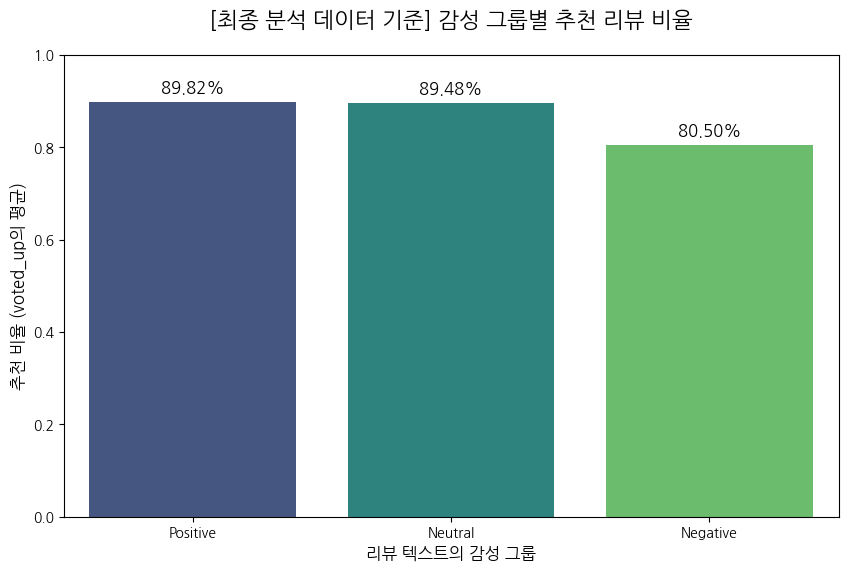

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# =============================================================
# ‚ú® [Î∂ÑÏÑù ÌÜµÏùºÏÑ± ÌôïÎ≥¥] ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Î∞ò Í∞êÏÑ± Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ‚ú®
# =============================================================

# --- 1. Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏÉùÏÑ±Îêú 'df_english' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§ ---
# df_english Í∞Ä Î©îÎ™®Î¶¨Ïóê ÏóÜÎã§Î©¥, Ïù¥Ï†Ñ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏó¨ Î®ºÏ†Ä ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

print(f"‚úÖ Î∂ÑÏÑù ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞: ÏòÅÏñ¥(ÎπÑÌïúÍµ≠Ïñ¥) Î¶¨Î∑∞ {len(df_english)}Í∞ú")

# --- 2. VADER Í∞êÏÑ± Î∂ÑÏÑù Ïû¨Ïã§Ìñâ ---
vader_analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    if not isinstance(text, str): return 0.0
    return vader_analyzer.polarity_scores(text)['compound']

print("\nVADER Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ï§ë...")
df_english['sentiment_score'] = df_english['translated_en'].progress_apply(get_vader_score)

# Í∞êÏÑ± Í∑∏Î£π Î∂ÑÎ•ò (Í∏∞Ï°¥Í≥º ÎèôÏùºÌïú Í∏∞Ï§Ä Ï†ÅÏö©)
def assign_sentiment_group_strict(score):
    if score >= 0.05: return 'Positive'
    elif score <= -0.3: return 'Negative'
    else: return 'Neutral'

df_english['sentiment_group'] = df_english['sentiment_score'].apply(assign_sentiment_group_strict)
print("Í∞êÏÑ± Í∑∏Î£π Î∂ÑÎ•ò ÏôÑÎ£å!")
print(df_english['sentiment_group'].value_counts())


# --- 3. Í∞êÏÑ± Í∑∏Î£πÎ≥Ñ Ï∂îÏ≤ú Î¶¨Î∑∞ ÎπÑÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ Ïû¨ÏãúÍ∞ÅÌôî ---
sentiment_recommend_ratio = df_english.groupby('sentiment_group')['voted_up'].mean().reindex(['Positive', 'Neutral', 'Negative'])

print("\n--- [ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã Í∏∞Ï§Ä] Í∞êÏÑ± Í∑∏Î£πÎ≥Ñ Ï∂îÏ≤ú(voted_up=1) ÎπÑÏú® ---")
print(sentiment_recommend_ratio)

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_recommend_ratio.index, y=sentiment_recommend_ratio.values, palette='viridis')
plt.title('[ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä] Í∞êÏÑ± Í∑∏Î£πÎ≥Ñ Ï∂îÏ≤ú Î¶¨Î∑∞ ÎπÑÏú®', fontsize=16, pad=20)
plt.ylabel('Ï∂îÏ≤ú ÎπÑÏú® (voted_upÏùò ÌèâÍ∑†)', fontsize=12)
plt.xlabel('Î¶¨Î∑∞ ÌÖçÏä§Ìä∏Ïùò Í∞êÏÑ± Í∑∏Î£π', fontsize=12)
plt.ylim(0, 1)

# ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for i, val in enumerate(sentiment_recommend_ratio):
    plt.text(i, val + 0.02, f'{val:.2%}', ha='center', fontsize=12)

plt.show()